In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
df=yf.download('TSLA',start='2020-11-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,131.333328,135.660004,130.766663,133.503326,133.503326,87063300
2020-11-03,136.576660,142.589996,135.563339,141.300003,141.300003,103055100
2020-11-04,143.539993,145.133331,139.033340,140.326660,140.326660,96429300
2020-11-05,142.766663,146.666672,141.333328,146.029999,146.029999,85243500
2020-11-06,145.366669,145.523331,141.426666,143.316666,143.316666,65118000
...,...,...,...,...,...,...
2023-11-30,245.139999,245.220001,236.910004,240.080002,240.080002,132353200
2023-12-01,233.139999,240.190002,231.899994,238.830002,238.830002,121173500
2023-12-04,235.750000,239.369995,233.289993,235.580002,235.580002,104099800


In [4]:
def MACD(df):
    df['EMA12'] = df.Close.ewm(span = 12).mean()
    df['EMA26'] = df.Close.ewm(span = 26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span = 9).mean()
    print('indicators added')

In [5]:
MACD(df)

indicators added


In [15]:
df.iloc[Buy].index

DatetimeIndex(['2020-11-17', '2020-12-31', '2021-03-12', '2021-03-31',
               '2021-05-26', '2021-07-12', '2021-07-30', '2021-08-30',
               '2021-09-27', '2021-10-07', '2021-10-12', '2021-12-27',
               '2022-01-12', '2022-02-08', '2022-02-15', '2022-03-01',
               '2022-03-16', '2022-05-27', '2022-08-15', '2022-09-12',
               '2022-10-25', '2022-11-25', '2023-01-09', '2023-03-23',
               '2023-05-05', '2023-07-05', '2023-08-25', '2023-10-05',
               '2023-11-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

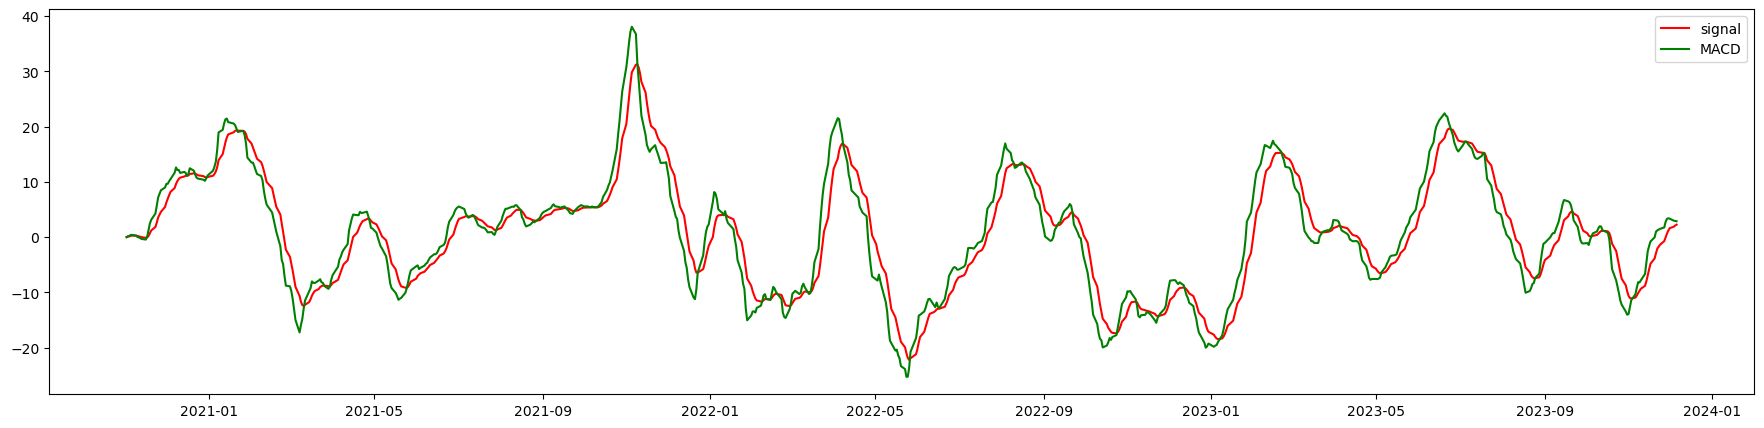

In [11]:
plt.figure(figsize=(22,5))
plt.plot(df.signal, label = 'signal', color='red')
plt.plot(df.MACD, label = 'MACD', color='green')
plt.legend()
plt.show()

In [12]:
Buy, Sell = [],[]
for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)
    

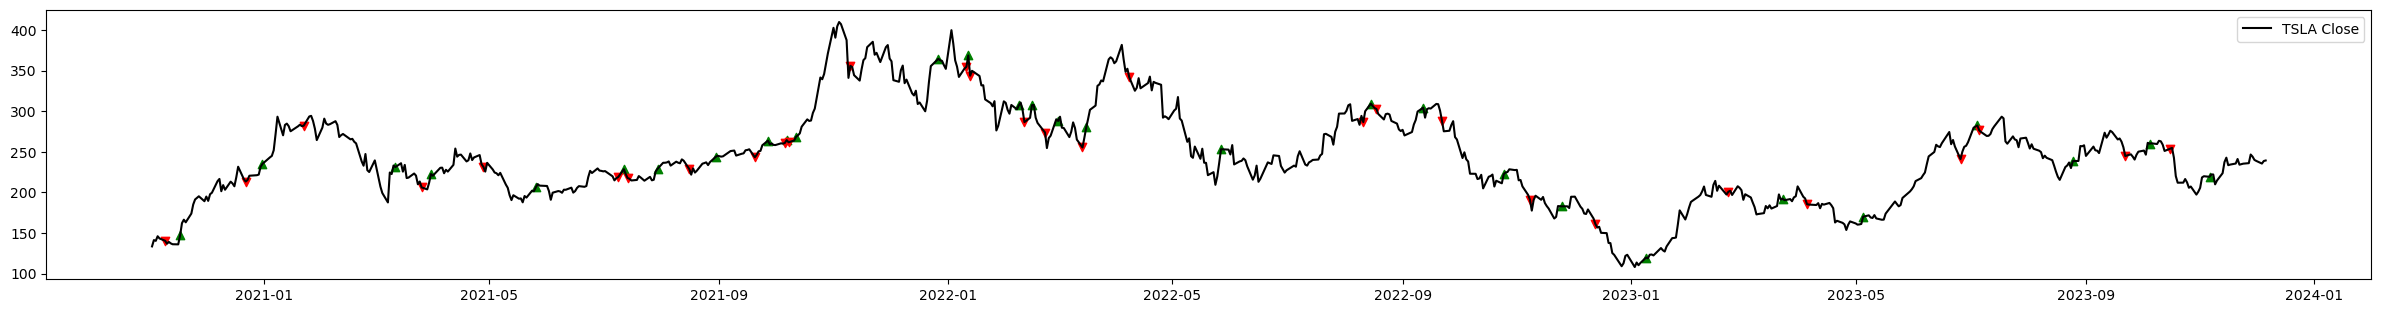

In [26]:
plt.figure(figsize=(30,3.5))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker = "^", color="green")
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker = "v", color="red")
plt.plot(df.Close, label='TSLA Close',color='k')
plt.legend()
plt.show()

In [27]:
Buy

[11,
 41,
 89,
 102,
 141,
 172,
 186,
 207,
 226,
 234,
 237,
 289,
 301,
 319,
 324,
 333,
 344,
 395,
 448,
 467,
 498,
 520,
 549,
 600,
 630,
 670,
 707,
 735,
 757]

In [28]:
Realbuys=[i+1 for i in Buy]
Realsells = [i+1 for i in Sell]

In [29]:
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsells]

In [30]:
Buyprices

Date
2020-11-18    149.449997
2021-01-04    239.820007
2021-03-15    231.363327
2021-04-01    229.456665
2021-05-27    206.746674
2021-07-13    228.773331
2021-08-02    233.333328
2021-08-31    244.333328
2021-09-28    262.399994
2021-10-08    265.403320
2021-10-13    270.156677
2021-12-28    369.829987
2022-01-13    369.690002
2022-02-09    311.666656
2022-02-16    304.683319
2022-03-02    290.709991
2022-03-17    276.996674
2022-05-31    257.946655
2022-08-16    311.666656
2022-09-13    292.899994
2022-10-26    219.399994
2022-11-28    179.960007
2023-01-10    121.070000
2023-03-24    191.649994
2023-05-08    173.720001
2023-07-06    278.089996
2023-08-28    242.580002
2023-10-06    253.979996
2023-11-07    219.979996
Name: Open, dtype: float64

In [31]:
Sellprices

Date
2020-11-10    140.029999
2020-12-23    210.733337
2021-01-25    285.000000
2021-03-29    205.213333
2021-04-29    233.169998
2021-07-12    220.733337
2021-07-15    219.463333
2021-08-17    224.220001
2021-09-21    244.929993
2021-10-07    261.820007
2021-10-11    262.549988
2021-11-11    367.589996
2022-01-12    359.616669
2022-01-14    339.959991
2022-02-14    287.190002
2022-02-23    276.809998
2022-03-15    258.423340
2022-04-11    326.799988
2022-08-12    289.416656
2022-08-19    299.000000
2022-09-23    283.089996
2022-11-09    190.779999
2022-12-14    159.250000
2023-02-23    203.910004
2023-04-06    183.080002
2023-06-27    243.240005
2023-07-07    278.429993
2023-09-25    243.380005
2023-10-17    250.100006
Name: Open, dtype: float64

In [36]:
if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices = Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1] > Sellprices.index[-1]:
    Buyprices = Buyprices.drop(Buyprices.index[-1])

In [37]:
profitsrel=[]

for i in range(len(Sellprices)):
    profitsrel.append((Sellprices[i]-Buyprices[i])/Buyprices[i])

C:\Users\91955\AppData\Local\Temp\ipykernel_35088\4113457322.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  profitsrel.append((Sellprices[i]-Buyprices[i])/Buyprices[i])


In [39]:
sum(profitsrel)/len(profitsrel)

0.05220032282853206

In [40]:
import pandas as pd

In [42]:
pd.DataFrame(profitsrel).mean()

0    0.0522
dtype: float64